# Get Started Demo

Use the TyxonQ cloud platform to create and view the results of quantum computing programs.

## Create a simple quantum computing program

In [1]:
import os
import sys

In [2]:
import getpass

In [4]:
import tyxonq as tq

In [5]:
from tyxonq.cloud import apis

### Set API KEY
To get API_KEY, visit: 

In [6]:
def set_api_key():
    API_KEY = getpass.getpass("Input your TyxonQ API_KEY:")
    apis.set_token(API_KEY)

In [7]:
set_api_key()

Input your TyxonQ API_KEY: ········


## List tasks

In [23]:
tasks = apis.list_tasks(provider="tyxonq",  device="homebrew_s2")
for task in tasks:
    print(task.details())

## Create 

In [9]:
def create_circuit():
    c = tq.Circuit(2)
    c.h(0)
    c.cx(0, 1)
    print(c.to_qir())
    qisc = tq.translation.qir2qiskit(c.to_qir(), 2)
    print(qisc.data)
    return c

In [ ]:
c = create_circuit()

In [12]:
c.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

## Submit Task to TyxonQ

In [13]:
task = apis.submit_task(provider = "tyxonq",
                        device = "homebrew_s2",
                        circuit = c,
                        shots = 100)

# View task details

In [16]:
task.details()

{'id': 'job_080BC7FF63EE11F08C5077CC00B54BA3_a5f1e984-b810-46c2-8650-ac0dfccff47a',
 'queue': 'quregenai.lab',
 'device': 'homebrew_s2?o=3',
 'qubits': 2,
 'depth': 3,
 'state': 'completed',
 'shots': 100,
 'at': 1753014877511576,
 'ts': {'completed': 1753014877511576,
  'pending': 1753014874992761,
  'scheduled': 1753014874986324},
 'md5': 'af616d14e0422e8ffd361d71a1479f1c',
 'runAt': 1753014861971024,
 'runDur': 1757053,
 'atChip': 1753014827126258,
 'durChip': 104877,
 'result': {'00': 45, '01': 5, '10': 1, '11': 49},
 'results': {'00': 45, '01': 5, '10': 1, '11': 49},
 'job_name': 'job_080BC7FF63EE11F08C5077CC00B54BA3_a5f1e984-b810-46c2-8650-ac0dfccff47a',
 'status': '处理中',
 'user_id': '080BC7FF63EE11F08C5077CC00B54BA3',
 'success': True,
 'error': None}

In [22]:
counts = task.results()

In [23]:
counts

{'00': 53, '11': 44, '01': 2, '10': 1}

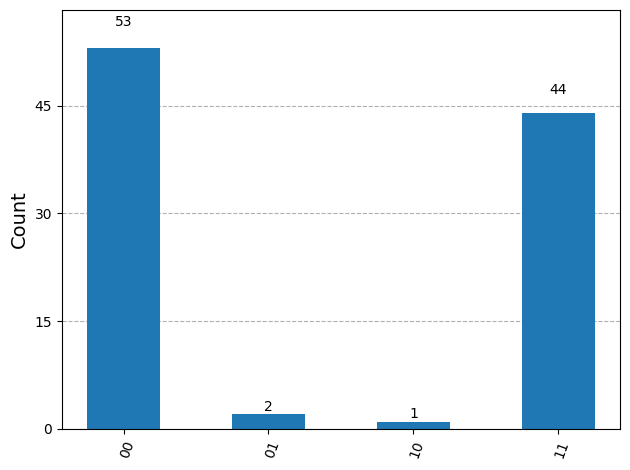

In [24]:
tq.results.counts.plot_histogram(counts)